# Classification 03

# CART - Classification and regression trees

#### Josep Fortiana 2019-11-05

The `rpart` function (recursive partitioning) in the `rpart` R package implements the _Classification And Regresion Trees (CART)_ algorithm by Breiman and Friedman. Its main features are: (a) It can predict either a numerical response (regression) or a qualitative response (classification), and (b) Ability to deal with both qualitative and numerical predictors. Furthermore, (c) In each CART partition step the optimized quantity is, by default, Gini's impurity index (see [Victor Zhou's blog](https://victorzhou.com/blog/gini-impurity/), instead of the information gain used in the predecessor algorithm ID3, or the $\chi^2$ statistic used in CHAID. The `rpart` implementation includes information gain as an optional parameter, which allows us to simulate ID3, as we see below.

The CART algorithm works by recursively partitioning a `train` data set in successive steps, in each of which according to values of one of the predictor variables, chosen as the one optimizing the impurity index.

Each continuous numerical predictor is treated by sweeping its range and locating an interior point where the impurity index increment resulting from a partition attains an extreme value. The partition is then performed according to the variable for which this extreme value is the best. It is possible that two or more partitions in the resulting hierarchy is done according to the same predictor.

## 1. Classification with _CART_

## 1.1. `synth.tr` and `synth.te` data sets

### Synthetic Classification Problem

#### Description

The `synth.tr` data frame has 250 rows and 3 columns. The `synth.te` data frame has 100 rows and 3 columns. It is intended that `synth.tr` be used from training and `synth.te` for testing.

#### Format

These data frames contains the following columns:

`xs` : x-coordinate

`ys` : y-coordinate

`yc` : class, coded as 0 or 1.

#### Source

Ripley, B.D. (1994),  "Neural networks and related methods for classification (with discussion)". Journal of the Royal Statistical Society series B 56, 409–456.

In [6]:
require(MASS)
data(synth.tr)
data(synth.te)
str(synth.tr)
str(synth.te)

Loading required package: MASS


'data.frame':	250 obs. of  3 variables:
 $ xs: num  0.051 -0.748 -0.773 0.218 0.373 ...
 $ ys: num  0.161 0.089 0.263 0.127 0.497 ...
 $ yc: int  0 0 0 0 0 0 0 0 0 0 ...
'data.frame':	1000 obs. of  3 variables:
 $ xs: num  -0.971 -0.632 -0.774 -0.606 -0.539 ...
 $ ys: num  0.429 0.252 0.691 0.176 0.377 ...
 $ yc: int  0 0 0 0 0 0 0 0 0 0 ...


Cast `yc` as a factor (it is numerically coded 0/1). This is important for `rpart` as it deals with both classification and regression; if not explicitly stated the program has no way to know this response is a label in a classification problem.

In [7]:
synth.tr$yc<-factor(synth.tr$yc)
synth.te$yc<-factor(synth.te$yc)

 #### Tree construction

In [8]:
#install.packages("rpart",dependencies=TRUE,repos="https://cloud.r-project.org")
require(rpart)

In [9]:
synth.rpart<-rpart(yc~xs+ys,data=synth.tr)

#### Show the tree

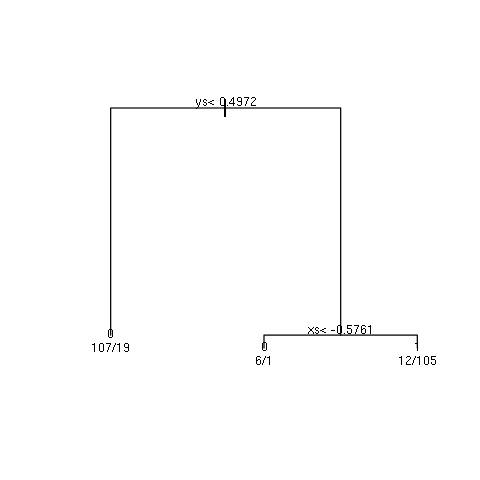

In [10]:
options(repr.plot.width=4,repr.plot.height=4)
plot(synth.rpart)
text(synth.rpart,use.n=TRUE,xpd=2,cex=0.6)

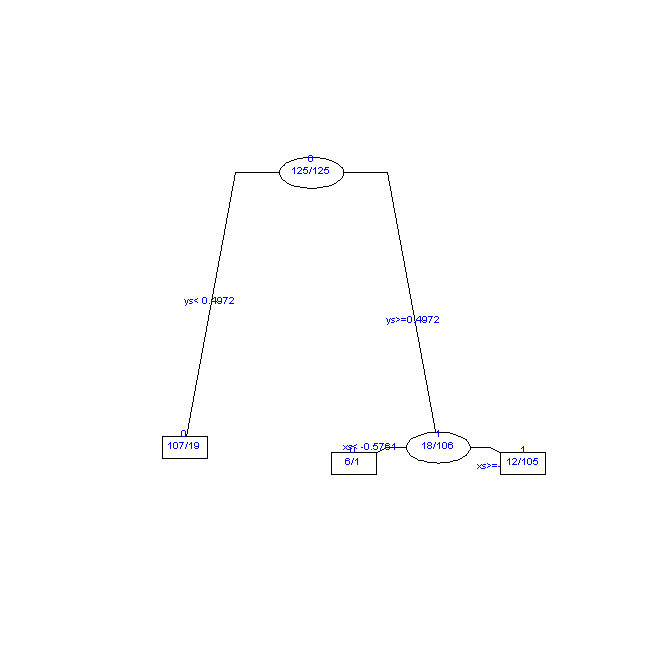

In [6]:
#
# See the help in 'plot.rpart' and 'test.rpart'
#
# 'margin' space around tree
# 'branch' to decie whether to plot a 'square' tree or with not orthogonal branch angles
options(repr.plot.width=5.5,repr.plot.height=5.5)
plot(synth.rpart,branch=0.6,margin=0.2,lwd=2)
# 'splits' to label each partition
# 'all' to label all nodel (instead of only terminal nodes)
# 'xpd' to allow extending labels out of the plot rectangle
# 'cex' scale of labels
# 'fancy' to put frames around nodes
# 'fwidth' ,'fheight', scale for frames around nodes
text(synth.rpart,use.n=TRUE,fancy=TRUE,fwidth=0.4,fheight=0.4,splits=TRUE,cex=0.5,all=TRUE,xpd=2,col="blue")

#### Confusion matrix

In [7]:
synth.rpart.pred<- predict(synth.rpart,synth.te, type = "class")
synth.rpart.conf<-table(True = synth.te$yc, Pred = synth.rpart.pred)
synth.rpart.conf

    Pred
True   0   1
   0 469  31
   1  72 428

#### Misclassification error estimate

In [8]:
n<-sum(synth.rpart.conf)
n1<-sum(diag(synth.rpart.conf))
P.err<-100*(n-n1)/n
round(P.err,3)

[1] 10.3

The resulting tree can be modulated by modifying control parameters in `rpart`. This can be done through the `rpart.control()` function. See the help to find about possible parameters to be modified and their default values. For instance:

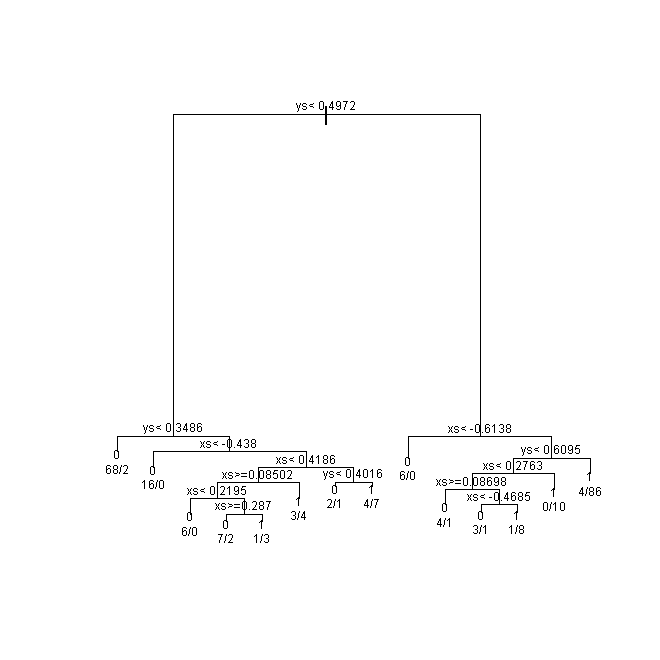

In [9]:
options(repr.plot.width=5.5,repr.plot.height=5.5)
control.parms<-rpart.control(minsplit = 10,cp=0.005)
synth.rpart.2<-rpart(yc~xs+ys,data=synth.tr,control=control.parms)
plot(synth.rpart.2)
text(synth.rpart.2,use.n=TRUE,xpd=2,cex=0.6)

#### Confusion matrix

In [10]:
synth.rpart.2.pred<-predict(synth.rpart.2,synth.te,type="class")
synth.rpart.2.conf<-table(True = synth.te$yc,Pred=synth.rpart.2.pred)
synth.rpart.2.conf

    Pred
True   0   1
   0 449  51
   1  50 450

#### Misclassification error estimate 

In [11]:
n.2<-sum(synth.rpart.2.conf)
n1.2<-sum(diag(synth.rpart.2.conf))
P.err.2<-100*(n.2-n1.2)/n
round(P.err.2,3)

[1] 10.1

`minsplit` and `cp` are the most relevant parameters. Try with several values of these, and other, parameters, seeing their influence on the missclassification error estimate.

## 1.2. `Titanic` data

### Survival of passengers on the Titanic

#### Description

This data set provides information on the fate of passengers on the fatal maiden voyage of the ocean liner 'Titanic', summarized according to economic status (class), sex, age and survival.

#### Format

In the `datasets` R package, under the `Titanic`, these data appear in an aggregated form, as a table of frequencies. A 4-dimensional array resulting from cross-tabulating $2201$ observations on 4 variables. The variables and their levels are as follows:

    No	Name	  Levels
    1.	Class:	  "1st", "2nd", "3rd", "Crew",
    2.	Age:	  "Child", "Adult"
    3.	Sex:	  "Male", "Female",
    4.	Survived: "No", "Yes".

For the purpose of the present laboratory you may find it unfolded as a `data.frame` with $2201$ rows, one for each of the $2201$ passengers and crew, in the file `Titanic.data.txt`.

#### Details

The sinking of the Titanic is a famous event, and new books are still being published about it. Many well-known facts—from the proportions of first-class passengers to the ‘women and children first’ policy, and the fact that that policy was not entirely successful in saving the women and children in the third class—are reflected in the survival rates for various classes of passenger.

These data were originally collected by the British Board of Trade in their investigation of the sinking. Note that there is not complete agreement among primary sources as to the exact numbers on board, rescued, or lost.

Due in particular to the very successful film ‘Titanic’, the last years saw a rise in public interest in the Titanic. Very detailed data about the passengers is now available on the Internet, at sites such as [Encyclopedia Titanica](https://www.encyclopedia-titanica.org/).

Source
Dawson, Robert J. MacG. (1995), The ‘Unusual Episode’ Data Revisited. Journal of Statistics Education, 3. doi: 10.1080/10691898.1995.11910499.

The source provides a data set recording class, sex, age, and survival status for each person on board of the Titanic, and is based on data originally collected by the British Board of Trade and reprinted in:

British Board of Trade (1990), Report on the Loss of the ‘Titanic’ (S.S.). British Board of Trade Inquiry Report (reprint). Gloucester, UK: Allan Sutton Publishing.

In [12]:
Titanic1<-read.table("Titanic.data.txt",header=TRUE)
str(Titanic1)

'data.frame':	2201 obs. of  4 variables:
 $ Class   : Factor w/ 4 levels "1st","2nd","3rd",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Age     : Factor w/ 2 levels "adult","child": 1 1 1 1 1 1 1 1 1 1 ...
 $ Sex     : Factor w/ 2 levels "female","male": 2 2 2 2 2 2 2 2 2 2 ...
 $ Survived: Factor w/ 2 levels "no","yes": 2 2 2 2 2 2 2 2 2 2 ...


In [13]:
#install.packages("rpart",dependencies=TRUE,repos="https://cloud.r-project.org")
#install.packages("rpart.plot",dependencies=TRUE,repos="https://cloud.r-project.org")
require(rpart)
require(rpart.plot)

Loading required package: rpart.plot


The following classification uses the `rpart()` function to reproduce the behavior of the `ID3` algorithm. 

Then we try the `prp()`, in the `rpart.plot` package for plots. Here we show only one of the many possible graphics presentation options. RTFM to know them.

Warning message:
"cex and tweak both specified, applying both"

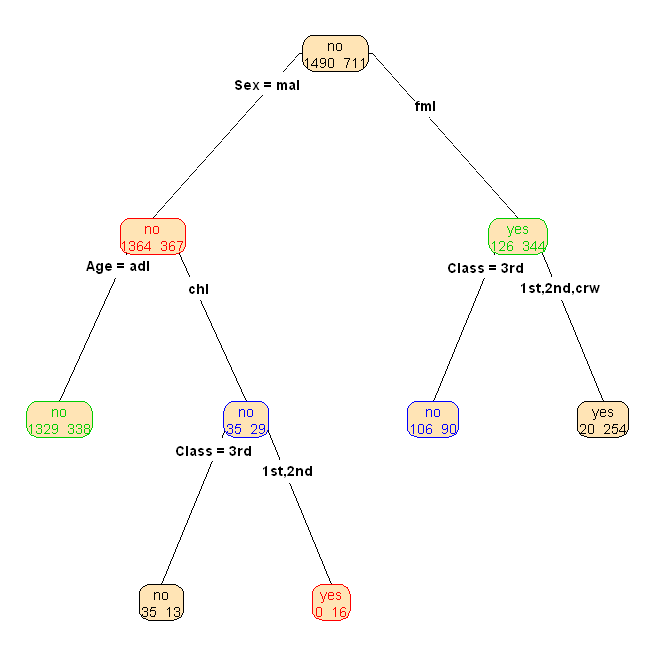

In [14]:
options(repr.plot.width=5.5,repr.plot.height=5.5)
Titanic.ID3<-rpart(Survived~.,data=Titanic1,minsplit=10,parms=list(split="information"))
prp(Titanic.ID3,type=4,extra=1,col=1:4,tweak=1.2,box.col="Moccasin",cex=0.6)

## 1.3. `SAheart` data

From the `ElemStatLearn` package, `SAheart` is a data frame with $462$ observations on the following $10$ variables.

01. `sbp`: systolic blood pressure.

02. `tobacco`: cumulative tobacco (kg).

03. `ldl`: low density lipoprotein cholesterol.

04. `adiposity`: a numeric vector.

05. `famhist`: family history of heart disease, a factor with levels `Absent`, `Present`.

06. `typea`: type-A behavior.

07. `obesity`: a numeric vector.

08. `alcohol`: current alcohol consumption.

09. `age`: age at onset

10. `chd`: response, coronary heart disease

##### Details

A retrospective sample of males in a heart-disease high-risk region of the Western Cape, South Africa. There are roughly two controls per case of CHD. Many of the CHD positive men have undergone blood pressure reduction treatment and other programs to reduce their risk factors after their CHD event. In some cases the measurements were made after these treatments. These data are taken from a larger dataset, described in Rousseauw et al, 1983, South African Medical Journal.

In [15]:
#install.packages("ElemStatLearn",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ElemStatLearn)
data(SAheart)
str(SAheart)

Loading required package: ElemStatLearn


'data.frame':	462 obs. of  10 variables:
 $ sbp      : int  160 144 118 170 134 132 142 114 114 132 ...
 $ tobacco  : num  12 0.01 0.08 7.5 13.6 6.2 4.05 4.08 0 0 ...
 $ ldl      : num  5.73 4.41 3.48 6.41 3.5 6.47 3.38 4.59 3.83 5.8 ...
 $ adiposity: num  23.1 28.6 32.3 38 27.8 ...
 $ famhist  : Factor w/ 2 levels "Absent","Present": 2 1 2 2 2 2 1 2 2 2 ...
 $ typea    : int  49 55 52 51 60 62 59 62 49 69 ...
 $ obesity  : num  25.3 28.9 29.1 32 26 ...
 $ alcohol  : num  97.2 2.06 3.81 24.26 57.34 ...
 $ age      : int  52 63 46 58 49 45 38 58 29 53 ...
 $ chd      : int  1 1 0 1 1 0 0 1 0 1 ...


Cast the response `chd` as a factor (it is numerically coded 0/1). This is important for `rpart()` as it deals with both classification and regression; if not explicitly stated the program has no way to know this response is a label in a classification problem.

In [16]:
SAheart$chd<-factor(SAheart$chd)

Optionally, `famhist` can be cast as a numeric predictor (in the given `data.frame` is a factor). This is not required for prediction trees, as the CART algorithm can directly process factor predictors, but it might be useful to compare results with other prediction methods.

In [17]:
#SAheart$famhist<-as.numeric(SAheart$famhist)

As usual, split the dataset in `train` and `test` subsets.

In [18]:
n<-nrow(SAheart)
ntrain<-ceiling(0.60*n)
Itrain<-sample(1:n,ntrain,replace=FALSE)
n<-nrow(SAheart)
ntrain<-ceiling(0.60*n)
Itrain<-sample(1:n,ntrain,replace=FALSE)
SAheart.train<-SAheart[Itrain,]
SAheart.test<-SAheart[-Itrain,]

Build a classification tree, compute the predictions for the `test` subset, obtain the confusion matrix and a misclassification error estimate.

In [19]:
#
#  Insert your code here
#

## 1.4. `Carseats` data with the `tree` package (from ISLR, lab 8.3, pag. 329)

[Code from the ISLR book](http://faculty.marshall.usc.edu/gareth-james/ISL/Chapter%208%20Lab.txt)

### Sales of Child Car Seats

#### Description

A simulated data set containing sales of child car seats at 400 different stores.

#### Format

A data frame with 400 observations on the following 11 variables.

01. `Sales`: Unit sales (in thousands) at each location

02. `CompPrice`: Price charged by competitor at each location

03. `Income`: Community income level (in thousands of dollars)

04. `Advertising`: Local advertising budget for company at each location (in thousands of dollars)

05. `Population`: Population size in region (in thousands)

06. `Price`: Price company charges for car seats at each site

07. `ShelveLoc`: A factor with levels "Bad", "Good" and "Medium" indicating the quality of the shelving location for the car seats at each site

08. `Age`: Average age of the local population

09. `Education`: Education level at each location

10. `Urban`: A factor with levels "No" and "Yes" to indicate whether the store is in an urban or rural location

11. `US`: A factor with levels "No" and "Yes" to indicate whether the store is in the US or not

#### Source

Simulated data

#### References

James, G., Witten, D., Hastie, T., and Tibshirani, R. (2013) [An Introduction to Statistical Learning with applications in R](www.StatLearning.com), Springer-Verlag, New York

In [20]:
#install.packages("ISLR",dependencies=TRUE,repos="https://cloud.r-project.org")
require(ISLR)
data(Carseats)
str(Carseats)

Loading required package: ISLR


'data.frame':	400 obs. of  11 variables:
 $ Sales      : num  9.5 11.22 10.06 7.4 4.15 ...
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...


In [21]:
summary(Carseats$Sales)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   5.390   7.490   7.496   9.320  16.270 

Discretize `Sales` into a factor, `High`, with two levels. Truncation value is slightly greater than the median, hence more than half of data are in the "No" class.

In [22]:
High<-ifelse(Carseats$Sales<=8,"No","Yes")
table(High)

High
 No Yes 
236 164 

Append the new variable to the `data.frame` (avoid using the original `Sales` variable as a predictor!).

In [23]:
Carseats.D<-data.frame(Carseats[,-1],High)
str(Carseats.D)

'data.frame':	400 obs. of  11 variables:
 $ CompPrice  : num  138 111 113 117 141 124 115 136 132 132 ...
 $ Income     : num  73 48 35 100 64 113 105 81 110 113 ...
 $ Advertising: num  11 16 10 4 3 13 0 15 0 0 ...
 $ Population : num  276 260 269 466 340 501 45 425 108 131 ...
 $ Price      : num  120 83 80 97 128 72 108 120 124 124 ...
 $ ShelveLoc  : Factor w/ 3 levels "Bad","Good","Medium": 1 2 3 3 1 1 3 2 3 3 ...
 $ Age        : num  42 65 59 55 38 78 71 67 76 76 ...
 $ Education  : num  17 10 12 14 13 16 15 10 10 17 ...
 $ Urban      : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 1 2 2 1 1 ...
 $ US         : Factor w/ 2 levels "No","Yes": 2 2 2 2 1 2 1 2 1 2 ...
 $ High       : Factor w/ 2 levels "No","Yes": 2 2 2 1 1 2 1 2 1 1 ...


In [24]:
#install.packages("tree",dependencies=TRUE,repos="https://cloud.r-project.org")
require(tree)

Loading required package: tree


In [25]:
# attach(Carseats) (not necessary to attach())
# Classification. Response is the new binary variable 'High' 
# 
Carseats.D.tree<-tree(High~.,Carseats.D)
# Alternative method, as in the book.
# If we did not remove 'Sales' from the dataset then we must discard it explicitly from the set of predictors.
#Carseats.D.tree<-tree(High~.-Sales,Carseats.D)

The `print()` method for the `tree` class generates a verbose description of nodes and splitting criteria.

In [26]:
print(Carseats.D.tree)

node), split, n, deviance, yval, (yprob)
      * denotes terminal node

  1) root 400 541.500 No ( 0.59000 0.41000 )  
    2) ShelveLoc: Bad,Medium 315 390.600 No ( 0.68889 0.31111 )  
      4) Price < 92.5 46  56.530 Yes ( 0.30435 0.69565 )  
        8) Income < 57 10  12.220 No ( 0.70000 0.30000 )  
         16) CompPrice < 110.5 5   0.000 No ( 1.00000 0.00000 ) *
         17) CompPrice > 110.5 5   6.730 Yes ( 0.40000 0.60000 ) *
        9) Income > 57 36  35.470 Yes ( 0.19444 0.80556 )  
         18) Population < 207.5 16  21.170 Yes ( 0.37500 0.62500 ) *
         19) Population > 207.5 20   7.941 Yes ( 0.05000 0.95000 ) *
      5) Price > 92.5 269 299.800 No ( 0.75465 0.24535 )  
       10) Advertising < 13.5 224 213.200 No ( 0.81696 0.18304 )  
         20) CompPrice < 124.5 96  44.890 No ( 0.93750 0.06250 )  
           40) Price < 106.5 38  33.150 No ( 0.84211 0.15789 )  
             80) Population < 177 12  16.300 No ( 0.58333 0.41667 )  
              160) Income < 60.5 6   0

The `summary()` method just a short description.

In [27]:
summary(Carseats.D.tree)


Classification tree:
tree(formula = High ~ ., data = Carseats.D)
Variables actually used in tree construction:
[1] "ShelveLoc"   "Price"       "Income"      "CompPrice"   "Population" 
[6] "Advertising" "Age"         "US"         
Number of terminal nodes:  27 
Residual mean deviance:  0.4575 = 170.7 / 373 
Misclassification error rate: 0.09 = 36 / 400 

The default `plot()` method. Actually it calls `plot.tree()`

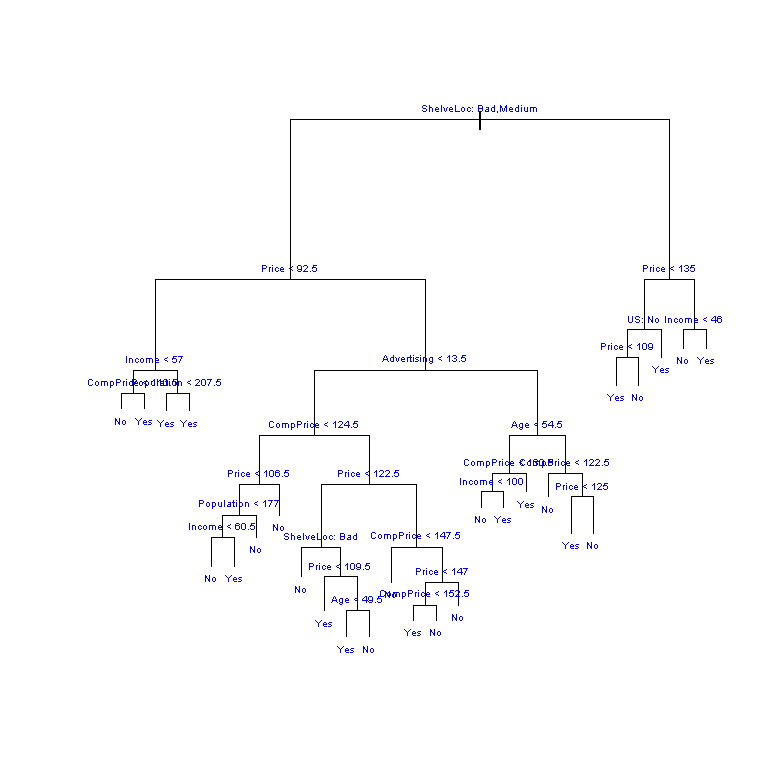

In [28]:
options(repr.plot.width=6.5,repr.plot.height=6.5)
plot(Carseats.D.tree)
text(Carseats.D.tree,pretty=0,cex=0.5,col="blue")

See the `proportional` key word in the help for `plot.tree()`.

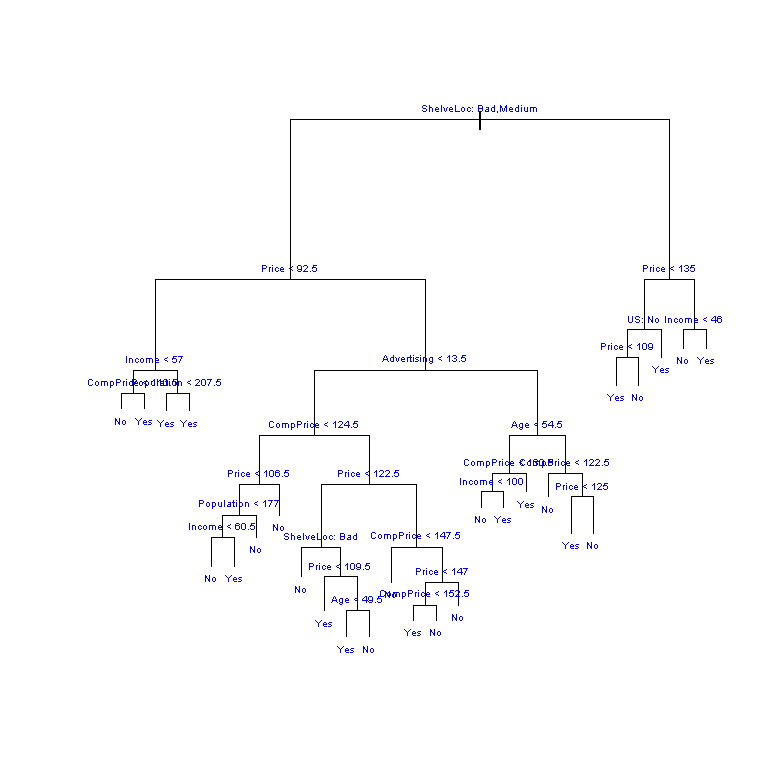

In [29]:
options(repr.plot.width=6.5,repr.plot.height=6.5)
plot(Carseats.D.tree,type='proportional')
text(Carseats.D.tree,pretty=0,cex=0.5,col="blue")

### Cross-validation to assess misclassification errors

In [30]:
# 'Hold-out' cross-validation 
set.seed(2)
n<-nrow(Carseats.D)
n.train<-floor(0.5*n)
n.test<-n-n.train
I.train<-sample(1:n, n.train)
Carseats.D.test<-Carseats.D[-I.train,]
High.test<-High[-I.train]

Confusion matrix

In [31]:
#Carseats.D.tree=tree(High~.-Sales,Carseats.D,subset=I.train)
Carseats.D.tree=tree(High~.,Carseats.D,subset=I.train)
Carseats.D.pred=predict(Carseats.D.tree,Carseats.D.test,type="class")
Carseats.D.conf<-table(Carseats.D.pred,High.test)
Carseats.D.conf
P.err<-(n.test-sum(diag(Carseats.D.conf)))/n.test
paste("Misclassification error estimate = ", round(P.err,3))

               High.test
Carseats.D.pred  No Yes
            No  104  33
            Yes  13  50

[1] "Misclassification error estimate =  0.23"

### Pruning to avoid overfitting

#### Using the hardwired `cv.tree()` function to prune the obtained tree.

In [32]:
set.seed(3)
Carseats.D.tree.CV=cv.tree(Carseats.D.tree,FUN=prune.misclass)
names(Carseats.D.tree.CV)
Carseats.D.tree.CV

[1] "size"   "dev"    "k"      "method"

$size
[1] 21 19 14  9  8  5  3  2  1

$dev
[1] 74 76 81 81 75 77 78 85 81

$k
[1] -Inf  0.0  1.0  1.4  2.0  3.0  4.0  9.0 18.0

$method
[1] "misclass"

attr(,"class")
[1] "prune"         "tree.sequence"

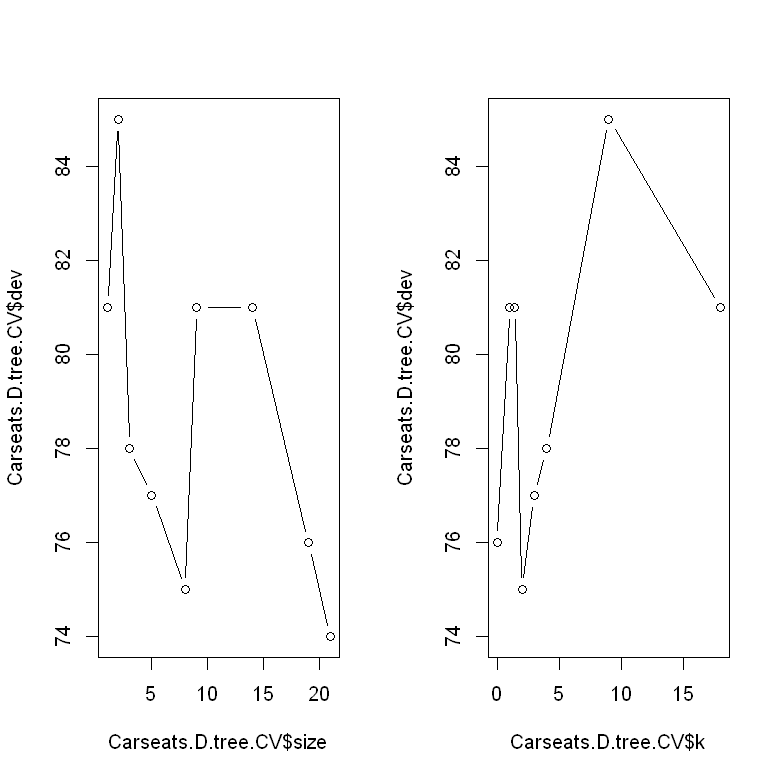

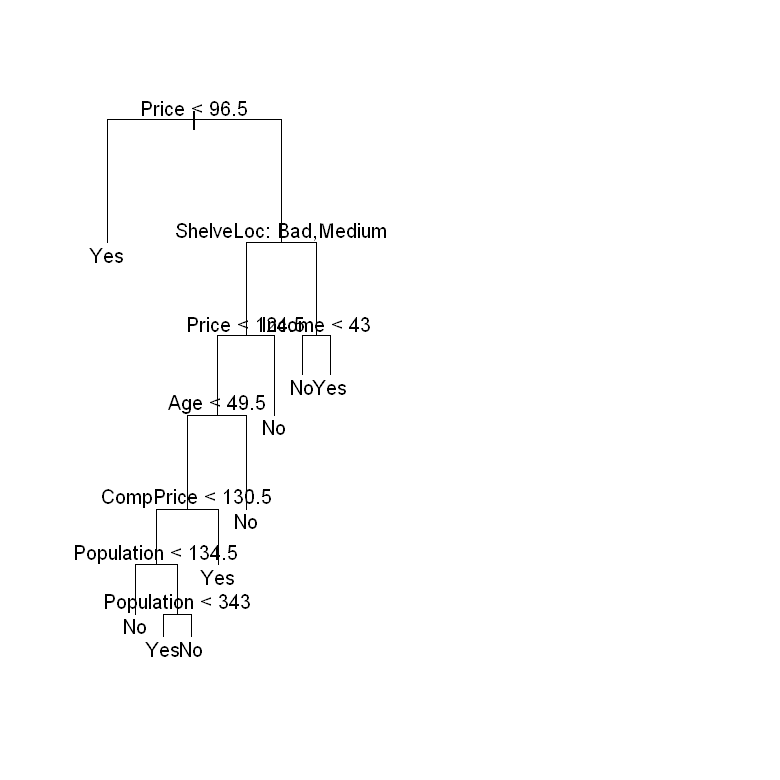

In [33]:
par(mfrow=c(1,2))
plot(Carseats.D.tree.CV$size,Carseats.D.tree.CV$dev,type="b")
plot(Carseats.D.tree.CV$k,Carseats.D.tree.CV$dev,type="b")
prune.carseats=prune.misclass(Carseats.D.tree,best=9)
plot(prune.carseats)
text(prune.carseats,pretty=0)

In [34]:
Carseats.D.pred=predict(prune.carseats,Carseats.D.test,type="class")
table(Carseats.D.pred,High.test)
#(94+60)/200

               High.test
Carseats.D.pred No Yes
            No  97  25
            Yes 20  58

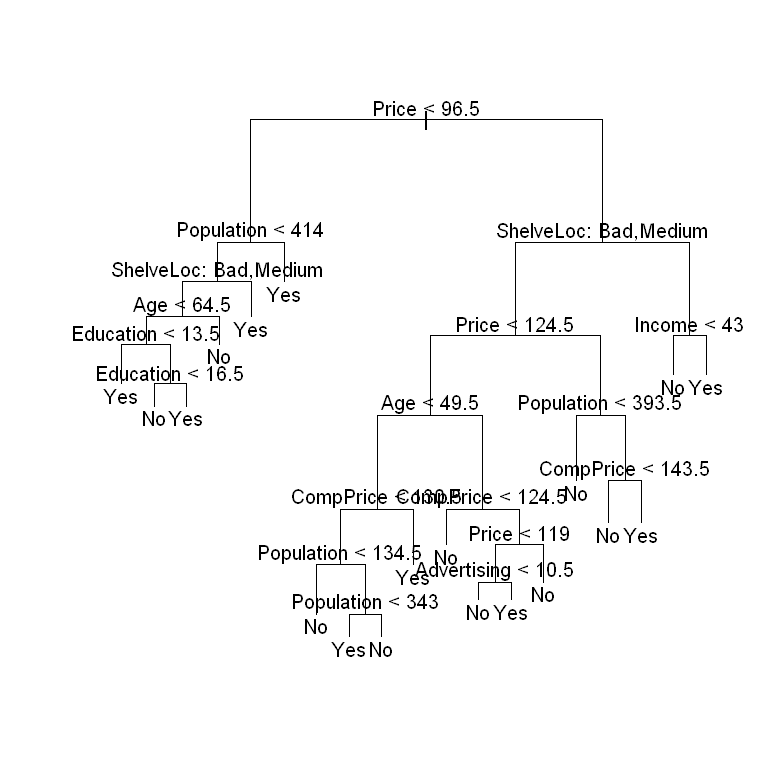

In [35]:
prune.carseats=prune.misclass(Carseats.D.tree,best=15)
plot(prune.carseats)
text(prune.carseats,pretty=0)

In [36]:
Carseats.D.pred=predict(prune.carseats,Carseats.D.test,type="class")
table(Carseats.D.pred,High.test)
#(86+62)/200

               High.test
Carseats.D.pred  No Yes
            No  102  30
            Yes  15  53

# 2. Regression with CART

## 2.0. Visualizing regression trees

Observe that in regression problems prediction functions are locally constant functions (step functions).

### Regression with a single continuous predictor

In [1]:
#install.packages("rpart",dependencies=TRUE,repos="https://cloud.r-project.org")
require(rpart)

Loading required package: rpart


### Training set: a collection of  $(x,y)$ pairs of values, coordinates of points on a parabola

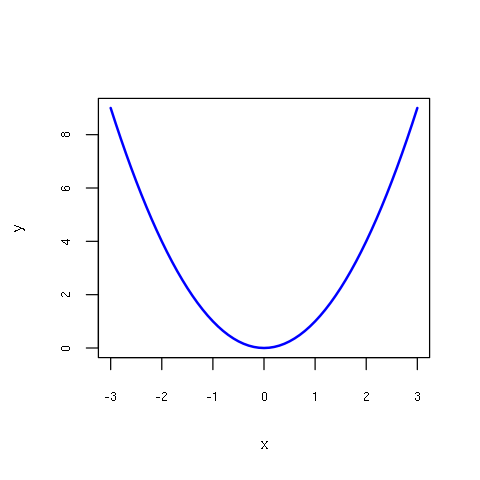

In [2]:
x<-seq(-3,3,by=0.1)
n<-length(x)
y<-x^2
options(repr.plot.width=4,repr.plot.height=4)
old.par<-par(cex.axis=0.6,cex.lab=0.7)
plot(x,y, "l",lwd=2,col="blue")
par(old.par)

### Build and show the tree

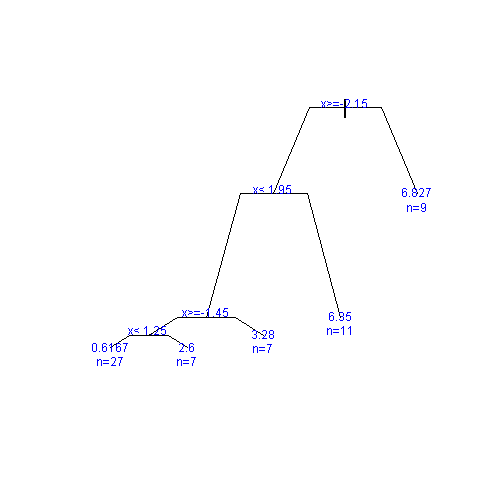

In [39]:
r<-rpart(y~x)
options(repr.plot.width=4,repr.plot.height=4)
plot(r,branch=0.5)
text(r,use.n=TRUE,xpd=2,cex=0.6, col="blue")

### Stepwise prediction function superimposed to training set

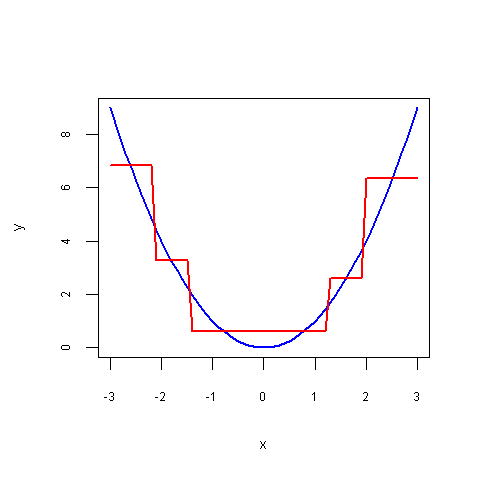

In [40]:
yp<-predict(r,newdata=data.frame(x))
options(repr.plot.width=4,repr.plot.height=4)
old.par<-par(cex.axis=0.6,cex.lab=0.7)
plot(x,y, "l",lwd=2,col="blue")
lines(x,yp,lwd=2,col="red")
par(old.par)

### Regression with two continuous numerical predictors

In [3]:
## Run this code chunk directly in RStudio. Dynamical graphics do not work well within a Jupyter notebook
#install.packages("tcltk",dependencies=TRUE,repos="https://cloud.r-project.org")
#install.packages("tkrgl",dependencies=TRUE,repos="https://cloud.r-project.org")
#install.packages("tkrplot",dependencies=TRUE,repos="https://cloud.r-project.org")
#install.packages("TeachingDemos",dependencies=TRUE,repos="https://cloud.r-project.org")
require(tcltk)
require(tkrgl)
require(tkrplot)
require(TeachingDemos)

Loading required package: tcltk
Loading required package: tkrgl
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tkrgl’”Loading required package: tkrplot
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tkrplot’”Loading required package: TeachingDemos
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘TeachingDemos’”

### A training set, a collection of pairs (2-dim predictor: `(x,y)`, response: `fxy.m`)

In [4]:
xy<-expand.grid(x,x)
fxy.v<-(1/2*pi)*exp(-0.5*(xy[,1]^2+xy[,2]^2))
fxy.m<-matrix(fxy.v,nrow=length(x))

In [46]:
## Run this code chunk directly in RStudio. Dynamical graphics do not work well within a Jupyter notebook
#rotate.persp(x,x,fxy.m)
#z<-fxy.v

### Build and show the tree

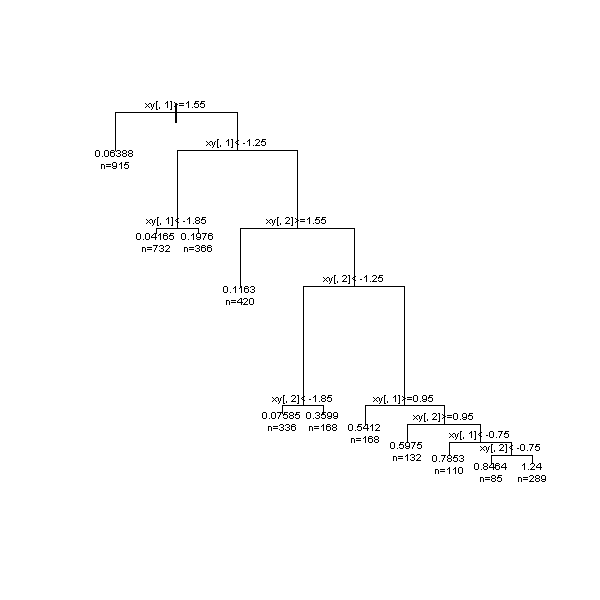

In [47]:
xy.rpart<-rpart(fxy.v~xy[,1]+xy[,2])
options(repr.plot.width=5,repr.plot.height=5)
plot(xy.rpart)
text(xy.rpart,use.n=TRUE,xpd=2,cex=0.5)

### Show the prediction function

In [48]:
## Run this code chunk directly in RStudio. Dynamical graphics do not work well within a Jupyter notebook
#xy.pred<-predict(xy.rpart,newdata=data.frame(xy))
#xy.pred.m<-matrix(xy.pred,nrow=length(x))
#rotate.persp(x,y,xy.pred.m)

## 2.1.  `Boston` data (from `MASS`)  with the `tree` package (from ISLR, lab 8.3.2, pag. 332)

[Code from the ISLR book](http://faculty.marshall.usc.edu/gareth-james/ISL/Chapter%208%20Lab.txt)

## Housing Values in Suburbs of Boston

### Description

The Boston data frame has 506 rows and 14 columns.

### Format

The Boston data frame has 506 rows and 14 columns (predictors). We have descriptions and summaries of predictors as follows:

01. `crim`: per capita crime rate by town.

02. `zn`: proportion of residential land zoned for lots over 25,000 sq.ft.

03. `indus`: proportion of non-retail business acres per town.

04. `chas`: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

05. `nox`: nitrogen oxides concentration (parts per 10 million).

06. `rm`: average number of rooms per dwelling.

07. `age`: proportion of owner-occupied units built prior to 1940.

08. `dis`: weighted mean of distances to five Boston employment centres.

09. `rad`: index of accessibility to radial highways.

10. `tax`: full-value property-tax rate per $10,000.

11. `ptratio`: pupil-teacher ratio by town.

12. `black`: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

13. `lstat`: lower status of the population (percent).

14. `medv`: median value of owner-occupied homes in $1000s.

In [49]:
require(MASS)
data(Boston)
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [50]:
set.seed(1)
train = sample(1:nrow(Boston), nrow(Boston)/2)

In [51]:
tree.boston=tree(medv~.,Boston,subset=train)
summary(tree.boston)


Regression tree:
tree(formula = medv ~ ., data = Boston, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

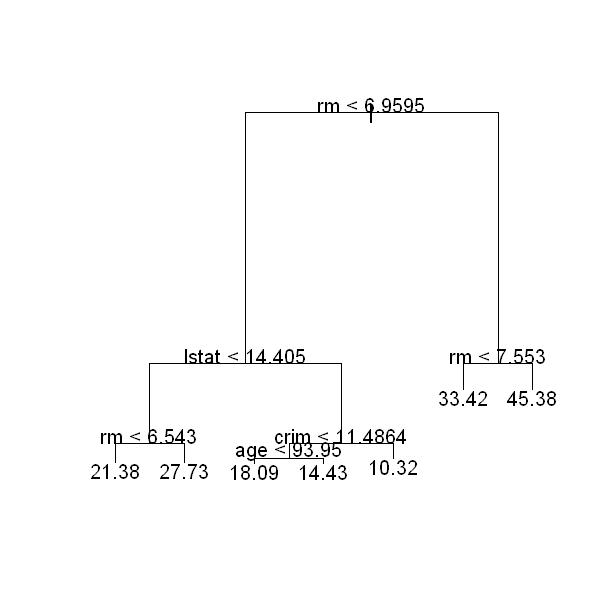

In [52]:
options(repr.plot.width=5,repr.plot.height=5)
plot(tree.boston)
text(tree.boston,pretty=0)

In [53]:
cv.boston=cv.tree(tree.boston)

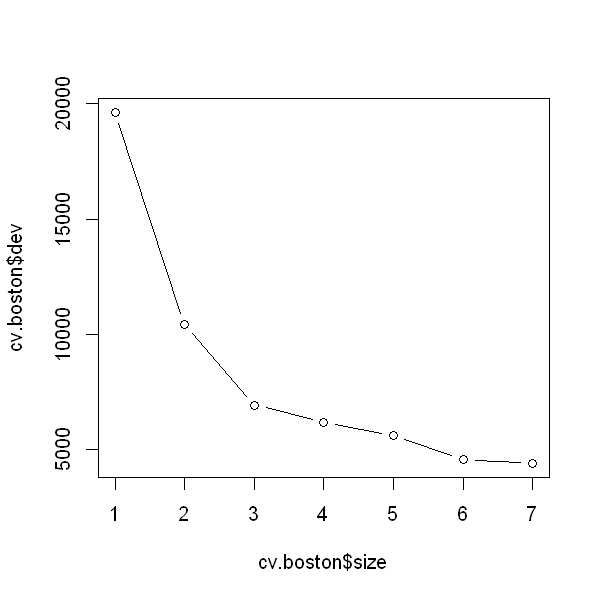

In [54]:
plot(cv.boston$size,cv.boston$dev,type='b')

### Pruning to avoid overfitting

In [55]:
prune.boston=prune.tree(tree.boston,best=5)

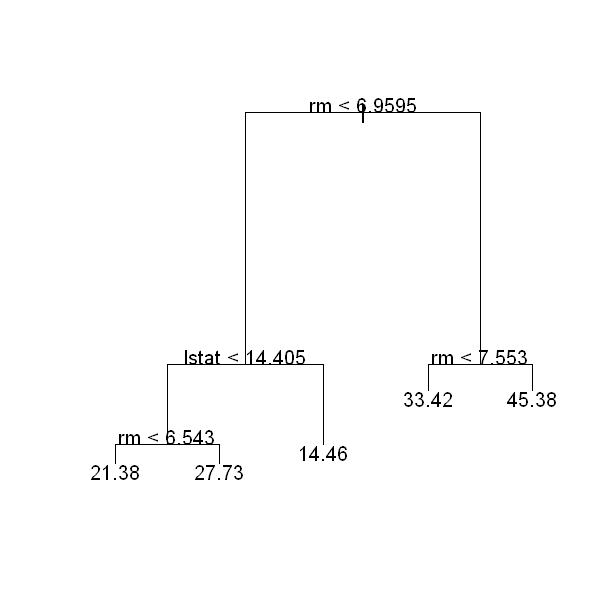

In [56]:
plot(prune.boston)
text(prune.boston,pretty=0)
yhat=predict(tree.boston,newdata=Boston[-train,])

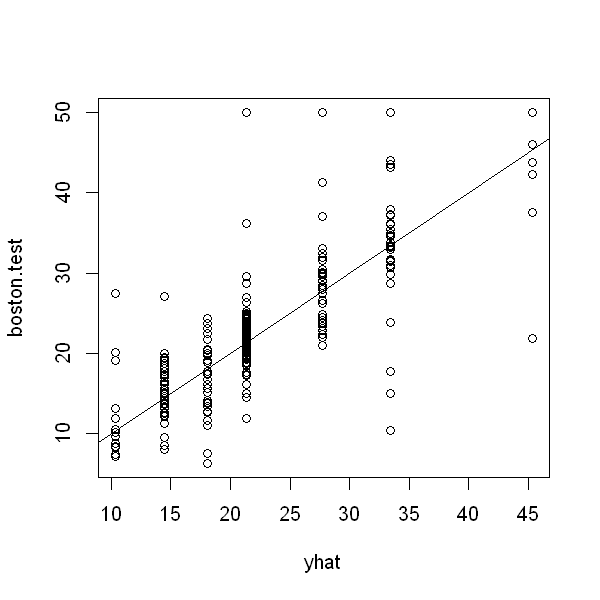

In [57]:
boston.test=Boston[-train,"medv"]
plot(yhat,boston.test)
abline(0,1)

In [58]:
mean((yhat-boston.test)^2)

[1] 35.28688

## 2.2. `cpus` data (from `MASS`)

## Performance of Computer CPUs

### Description

A relative performance measure and characteristics of 209 CPUs.

### Format

The components are:

01. `name`: manufacturer and model.

02. `syct`: cycle time in nanoseconds.

03. `mmin`: minimum main memory in kilobytes.

04. `mmax`: maximum main memory in kilobytes.

05. `cach`: cache size in kilobytes.

06. `chmin`: minimum number of channels.

07. `chmax`: maximum number of channels.

08. `perf`: published performance on a benchmark mix relative to an IBM 370/158-3.

09. `estperf`: estimated performance (by Ein-Dor & Feldmesser).

### Source

P. Ein-Dor and J. Feldmesser (1987), _Attributes of the performance of central processing units: a relative performance prediction model._ Comm. ACM. 30, 308–317.

### References

Venables, W. N. and Ripley, B. D. (2002) Modern Applied Statistics with S. Fourth edition. Springer.

In [59]:
require(MASS)
data(cpus)
str(cpus)

'data.frame':	209 obs. of  9 variables:
 $ name   : Factor w/ 209 levels "ADVISOR 32/60",..: 1 3 2 4 5 6 8 9 10 7 ...
 $ syct   : int  125 29 29 29 29 26 23 23 23 23 ...
 $ mmin   : int  256 8000 8000 8000 8000 8000 16000 16000 16000 32000 ...
 $ mmax   : int  6000 32000 32000 32000 16000 32000 32000 32000 64000 64000 ...
 $ cach   : int  256 32 32 32 32 64 64 64 64 128 ...
 $ chmin  : int  16 8 8 8 8 8 16 16 16 32 ...
 $ chmax  : int  128 32 32 32 16 32 32 32 32 64 ...
 $ perf   : int  198 269 220 172 132 318 367 489 636 1144 ...
 $ estperf: int  199 253 253 253 132 290 381 381 749 1238 ...


Discard the first variable, the brand label. 

If desired this list of brand labels can be saved as an auxiliary vector, to be used in plots.

We also discard the last (ninth) variable, an estimate of the response variable by the authors of the original paper.l:

In [60]:
labels<-cpus[,1]
cpus<-cpus[,2:8] 
rownames(cpus)<-as.character(labels)
str(cpus)

'data.frame':	209 obs. of  7 variables:
 $ syct : int  125 29 29 29 29 26 23 23 23 23 ...
 $ mmin : int  256 8000 8000 8000 8000 8000 16000 16000 16000 32000 ...
 $ mmax : int  6000 32000 32000 32000 16000 32000 32000 32000 64000 64000 ...
 $ cach : int  256 32 32 32 32 64 64 64 64 128 ...
 $ chmin: int  16 8 8 8 8 8 16 16 16 32 ...
 $ chmax: int  128 32 32 32 16 32 32 32 32 64 ...
 $ perf : int  198 269 220 172 132 318 367 489 636 1144 ...


Prepare a new `data.frame` with the logarithmic transform of the response:

In [61]:
logcpus<-cpus[,1:6]
logcpus$logperf<-log10(cpus$perf)
str(logcpus)

'data.frame':	209 obs. of  7 variables:
 $ syct   : int  125 29 29 29 29 26 23 23 23 23 ...
 $ mmin   : int  256 8000 8000 8000 8000 8000 16000 16000 16000 32000 ...
 $ mmax   : int  6000 32000 32000 32000 16000 32000 32000 32000 64000 64000 ...
 $ cach   : int  256 32 32 32 32 64 64 64 64 128 ...
 $ chmin  : int  16 8 8 8 8 8 16 16 16 32 ...
 $ chmax  : int  128 32 32 32 16 32 32 32 32 64 ...
 $ logperf: num  2.3 2.43 2.34 2.24 2.12 ...


In [62]:
#install.packages("rpart",dependencies=TRUE,repos="https://cloud.r-project.org")
require(rpart)

In [63]:
logcpus.rpart.01<-rpart(logperf~.,data=logcpus,cp=1.0e-3)

In [64]:
print(logcpus.rpart.01)

n= 209 

node), split, n, deviance, yval
      * denotes terminal node

  1) root 209 43.11554000 1.753333  
    2) cach< 27 143 11.79085000 1.524647  
      4) mmax< 6100 78  3.89374400 1.374824  
        8) mmax< 1750 12  0.78425160 1.088732 *
        9) mmax>=1750 66  1.94873300 1.426840  
         18) mmax< 2500 17  0.56676380 1.325292 *
         19) mmax>=2500 49  1.14584500 1.462071  
           38) chmax< 4.5 14  0.35284960 1.354804 *
           39) chmax>=4.5 35  0.56747110 1.504978  
             78) syct< 110 9  0.07741772 1.414738 *
             79) syct>=110 26  0.39139370 1.536215 *
      5) mmax>=6100 65  4.04520300 1.704434  
       10) syct>=360 7  0.12908090 1.279749 *
       11) syct< 360 58  2.50124700 1.755690  
         22) chmin< 5.5 46  1.22622900 1.698613  
           44) cach< 0.5 11  0.20206270 1.530643 *
           45) cach>=0.5 35  0.61627500 1.751403  
             90) chmin>=1.5 15  0.26087250 1.690337 *
             91) chmin< 1.5 20  0.25751430 1.797203 

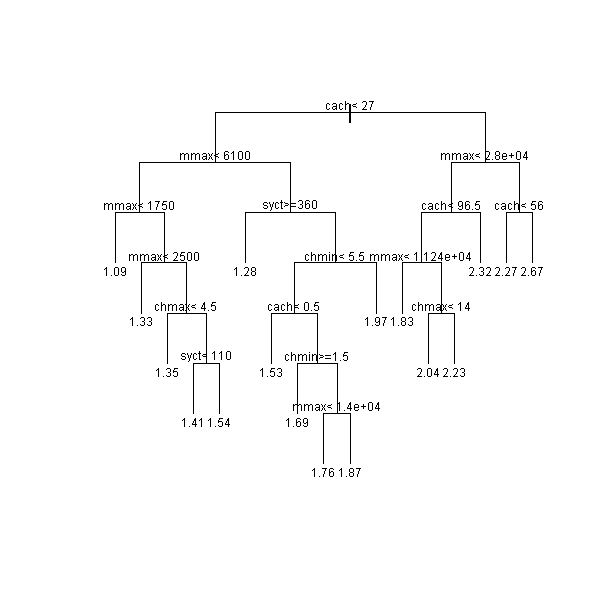

In [65]:
options(repr.plot.width=5,repr.plot.height=5)
plot(logcpus.rpart.01,uniform=TRUE)
text(logcpus.rpart.01,digits=3,cex=0.6)

### Pruning to avoid overfitting

#### Print values of the complexity parameter `cp`

In [66]:
printcp(logcpus.rpart.01)


Regression tree:
rpart(formula = logperf ~ ., data = logcpus, cp = 0.001)

Variables actually used in tree construction:
[1] cach  chmax chmin mmax  syct 

Root node error: 43.116/209 = 0.20629

n= 209 

          CP nsplit rel error  xerror     xstd
1  0.5492697      0   1.00000 1.00876 0.097175
2  0.0893390      1   0.45073 0.47045 0.047958
3  0.0876332      2   0.36139 0.41098 0.041916
4  0.0328159      3   0.27376 0.31317 0.031408
5  0.0269220      4   0.24094 0.31708 0.031502
6  0.0185561      5   0.21402 0.26620 0.027217
7  0.0167992      6   0.19546 0.26451 0.026823
8  0.0157908      7   0.17866 0.24550 0.025310
9  0.0094604      9   0.14708 0.24648 0.026248
10 0.0054766     10   0.13762 0.22284 0.023495
11 0.0052307     11   0.13215 0.22244 0.023620
12 0.0043985     12   0.12692 0.22244 0.023620
13 0.0022883     13   0.12252 0.21594 0.023442
14 0.0022704     14   0.12023 0.21639 0.023448
15 0.0014131     15   0.11796 0.21658 0.023365
16 0.0010000     16   0.11655 0.21947 0.023

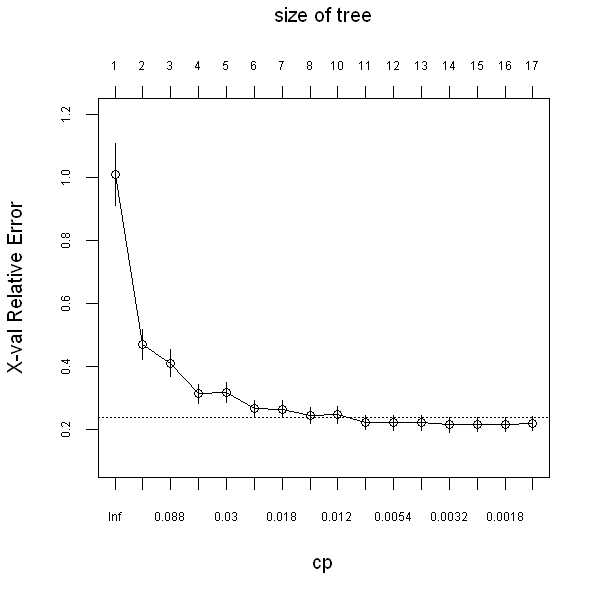

In [67]:
plotcp(logcpus.rpart.01,cex.axis=0.6)

In [68]:
print(logcpus.rpart.01,cp=0.006,digits=3)

n= 209 

node), split, n, deviance, yval
      * denotes terminal node

 1) root 209 43.1000 1.75  
   2) cach< 27 143 11.8000 1.52  
     4) mmax< 6.1e+03 78  3.8900 1.37  
       8) mmax< 1.75e+03 12  0.7840 1.09 *
       9) mmax>=1.75e+03 66  1.9500 1.43 *
     5) mmax>=6.1e+03 65  4.0500 1.70  
      10) syct>=360 7  0.1290 1.28 *
      11) syct< 360 58  2.5000 1.76  
        22) chmin< 5.5 46  1.2300 1.70  
          44) cach< 0.5 11  0.2020 1.53 *
          45) cach>=0.5 35  0.6160 1.75 *
        23) chmin>=5.5 12  0.5510 1.97 *
   3) cach>=27 66  7.6400 2.25  
     6) mmax< 2.8e+04 41  2.3400 2.06  
      12) cach< 96.5 34  1.5900 2.01  
        24) mmax< 1.12e+04 14  0.4250 1.83 *
        25) mmax>=1.12e+04 20  0.3830 2.14 *
      13) cach>=96.5 7  0.1720 2.32 *
     7) mmax>=2.8e+04 25  1.5200 2.56  
      14) cach< 56 7  0.0693 2.27 *
      15) cach>=56 18  0.6540 2.67 *


In [69]:
logcpus.rpart.02<-prune(logcpus.rpart.01,cp=0.006)

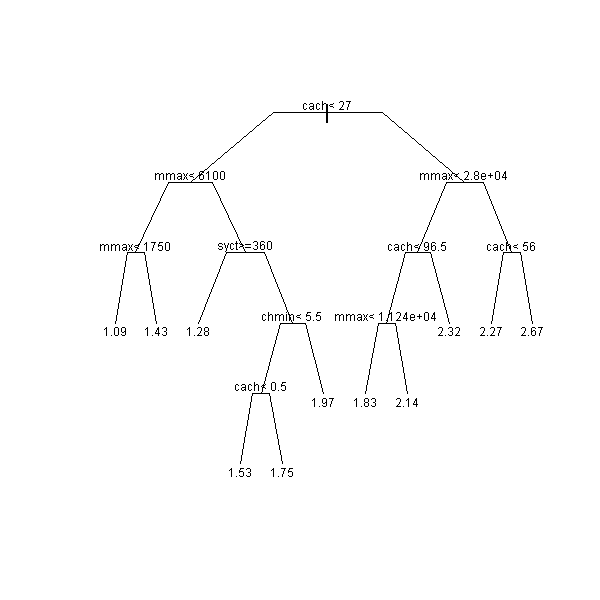

In [70]:
plot(logcpus.rpart.02,branch=0.4,uniform=TRUE)
text(logcpus.rpart.02,digits=3,cex=0.6)

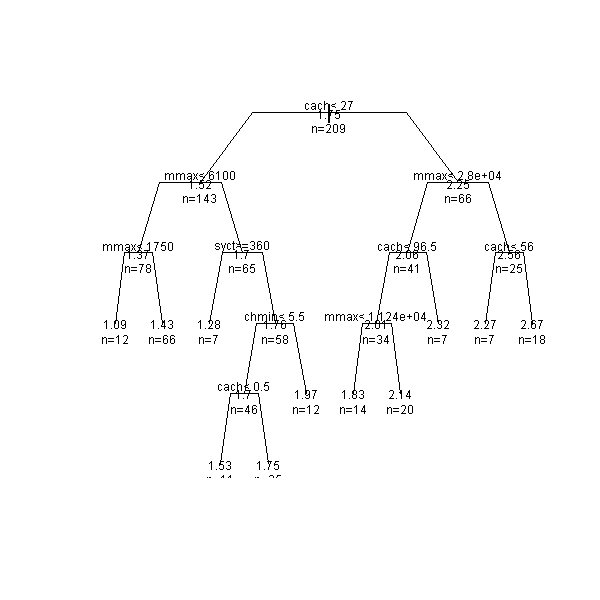

In [71]:
plot(logcpus.rpart.02,branch=0.6,compress=TRUE,uniform=TRUE)
text(logcpus.rpart.02,digits=3,all=TRUE,use.n=TRUE,cex=0.6)